# Week 3, Day 5: Support Vector Machines (SVM)

## Learning Objectives
- Understand SVM concepts and theory
- Learn about kernels and their applications
- Master SVM parameters and tuning
- Practice implementing SVM for classification

## Topics Covered
1. Linear SVM
2. Kernel SVM
3. Parameter Tuning
4. Model Evaluation

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 1. Linear SVM

Linear SVM Performance:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



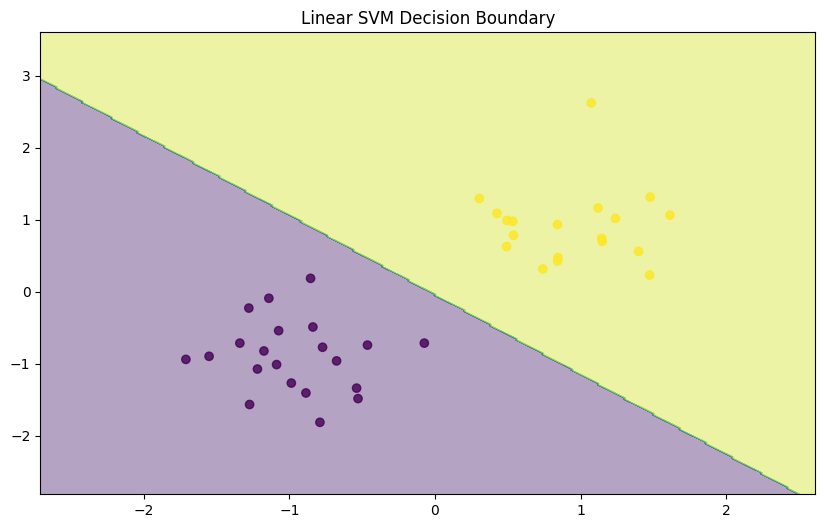

In [5]:
def linear_svm_example():
    # Generate linearly separable data
    np.random.seed(42)
    n_samples = 100

    # Create two clusters
    X_0 = np.random.randn(n_samples, 2) - [2, 2]
    X_1 = np.random.randn(n_samples, 2) + [2, 2]
    X = np.vstack([X_0, X_1])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train model
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = svm.predict(X_test_scaled)

    # Print performance metrics
    print("Linear SVM Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize decision boundary
    plt.figure(figsize=(10, 6))

    # Create mesh grid
    x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
    y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, alpha=0.8)
    plt.title('Linear SVM Decision Boundary')
    plt.show()

linear_svm_example()

## 2. Kernel SVM

In [ ]:
def kernel_svm_example():
    # Generate non-linearly separable data
    np.random.seed(42)
    n_samples = 100

    # Create circular pattern
    X_0 = np.random.randn(n_samples, 2)
    X_1 = 2 + np.random.randn(n_samples, 2)
    X_1 = np.vstack([X_1[:n_samples//2], -X_1[n_samples//2:]])
    X = np.vstack([X_0, X_1])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train models with different kernels
    kernels = ['linear', 'rbf', 'poly']
    plt.figure(figsize=(15, 5))

    for i, kernel in enumerate(kernels, 1):
        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train_scaled, y_train)
        y_pred = svm.predict(X_test_scaled)

        print(f"\n{kernel.upper()} Kernel Performance:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

        # Plot decision boundary
        plt.subplot(1, 3, i)

        x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
        y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))

        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, alpha=0.8)
        plt.title(f'{kernel.upper()} Kernel')

    plt.tight_layout()
    plt.show()

kernel_svm_example()

## 3. Parameter Tuning

In [ ]:
def tune_svm_parameters():
    from sklearn.model_selection import GridSearchCV

    # Generate data
    np.random.seed(42)
    n_samples = 300

    X = np.random.randn(n_samples, 2)
    y = (X[:, 0]**2 + X[:, 1]**2 > 2).astype(int)

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define parameter grid
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.1, 1],
        'degree': [2, 3, 4]
    }

    # Perform grid search
    svm = SVC(random_state=42)
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Evaluate best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    print("\nTest Set Performance:")
    print(classification_report(y_test, y_pred))

    # Visualize parameter effects
    results = pd.DataFrame(grid_search.cv_results_)

    plt.figure(figsize=(15, 5))

    # Plot C parameter effect
    plt.subplot(131)
    sns.boxplot(x='param_C', y='mean_test_score', data=results)
    plt.title('Score vs C')

    # Plot gamma parameter effect
    plt.subplot(132)
    gamma_numeric = results['param_gamma'].apply(lambda x: 1 if x == 'scale' else (0.5 if x == 'auto' else x))
    sns.boxplot(x=gamma_numeric, y='mean_test_score', data=results)
    plt.title('Score vs gamma')

    # Plot degree parameter effect
    plt.subplot(133)
    sns.boxplot(x='param_degree', y='mean_test_score', data=results)
    plt.title('Score vs degree')

    plt.tight_layout()
    plt.show()

tune_svm_parameters()

## Practical Exercises

In [ ]:
# Exercise 1: Image Classification

def image_classification_exercise():
    from sklearn.datasets import load_digits

    # Load digits dataset
    digits = load_digits()
    X, y = digits.data, digits.target

    print("Dataset shape:", X.shape)
    print("Number of classes:", len(np.unique(y)))

    # Display sample images
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(digits.images[i], cmap='gray')
        plt.title(f'Digit: {y[i]}')
        plt.axis('off')
    plt.show()

    # Task: Implement SVM for digit classification
    # 1. Split and scale the data
    # 2. Train SVM with different kernels
    # 3. Compare their performance
    # 4. Create confusion matrix

    # Your code here

image_classification_exercise()

In [ ]:
# Exercise 2: Comparing Classifiers

def compare_classifiers():
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier

    # Generate complex dataset
    np.random.seed(42)
    n_samples = 300

    # Create spiral data
    def make_spiral(n_samples, noise=0.5):
        n = np.sqrt(np.random.rand(n_samples,1)) * 780 * (2*np.pi)/360
        d1x = -np.cos(n)*n + np.random.rand(n_samples,1) * noise
        d1y = np.sin(n)*n + np.random.rand(n_samples,1) * noise
        return np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y))))

    X = make_spiral(n_samples//2)
    y = np.hstack((np.zeros(n_samples//2), np.ones(n_samples//2)))

    # Task: Compare different classifiers
    # 1. Implement multiple classifiers
    # 2. Compare their performance
    # 3. Visualize decision boundaries
    # 4. Analyze strengths and weaknesses

    # Your code here

compare_classifiers()

## MCQ Quiz

1. What is the main objective of SVM?
   - a) Minimize error
   - b) Maximize margin
   - c) Reduce dimensionality
   - d) Feature selection

2. What is the kernel trick used for?
   - a) Feature scaling
   - b) Dimensionality reduction
   - c) Non-linear classification
   - d) Parameter tuning

3. Which kernel is best for linearly separable data?
   - a) RBF
   - b) Polynomial
   - c) Linear
   - d) Sigmoid

4. What does the C parameter control?
   - a) Kernel type
   - b) Regularization
   - c) Learning rate
   - d) Number of iterations

5. What are support vectors?
   - a) All data points
   - b) Points closest to decision boundary
   - c) Misclassified points
   - d) Center points

6. Which kernel is most commonly used?
   - a) Linear
   - b) RBF
   - c) Polynomial
   - d) Sigmoid

7. What does gamma control in RBF kernel?
   - a) Margin width
   - b) Decision boundary smoothness
   - c) Learning rate
   - d) Number of features

8. When should you use SVM?
   - a) Large datasets only
   - b) Small to medium datasets
   - c) Text data only
   - d) Time series only

9. What is the time complexity of SVM training?
   - a) O(n)
   - b) O(n²)
   - c) O(n³)
   - d) O(log n)

10. Which preprocessing step is important for SVM?
    - a) Feature scaling
    - b) Feature selection
    - c) Dimensionality reduction
    - d) Data augmentation

Answers: 1-b, 2-c, 3-c, 4-b, 5-b, 6-b, 7-b, 8-b, 9-c, 10-a